#__Problem Set 3__


-----



###__Question 1__
```
Solution in file A1.cs in same directory
```

###__Question 2__

```
Solution in file A2.cs in same directory
```

###__Question 3__

Step 1. Import the necessary libraries.

In [273]:
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:
* The first a random number from 1 to 4
* The second a random number from 1 to 3
* The third a random number from 10,000 to 30,000

In [274]:
Series1 = pd.Series(np.random.randint(1,4,size=100))
Series2 = pd.Series(np.random.randint(1,3,size=100))
Series3 = pd.Series(np.random.randint(10000,30000,size=100))

Step 3. Create a DataFrame by joinning the Series by column.

In [275]:
Df3 = pd.DataFrame([Series1, Series2, Series3])
Df3 = Df3.transpose()

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter.

In [276]:
Df3.rename(columns = {0:"bedrs", 1:"bathrs", 2:"price_sqr_meter"}, inplace = True)

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'.

In [277]:
Df3_1 = pd.DataFrame()
Df3_1 = pd.concat([Df3['bedrs'], Df3['bathrs'], Df3['price_sqr_meter']], ignore_index=True, axis=0)
Df3['bigcolumn'] = pd.Series(Df3_1, index=Df3.index)
Df3

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,2,2,21817,2
1,2,2,28035,2
2,3,2,17268,3
3,3,2,16554,3
4,3,2,26103,3
...,...,...,...,...
95,3,1,11212,3
96,3,2,14553,3
97,2,2,14552,2
98,2,1,22264,2


Step 6. Ops it seems it is going only until index 99. Is it true?

```
Yes
```

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [283]:
Df3 = Df3.reindex(index=range(0,300))
Df3

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,2.0,2.0,21817.0,2.0
1,2.0,2.0,28035.0,2.0
2,3.0,2.0,17268.0,3.0
3,3.0,2.0,16554.0,3.0
4,3.0,2.0,26103.0,3.0
...,...,...,...,...
295,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN


###__Question 4__

Step 1. Import the necessary libraries

In [284]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data).

In [285]:
cols = ['Yr','Mo','Dy','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']
values = [[61, 1, 1, 15.04, 14.96, 13.17, 9.29, np.NaN, 9.87, 13.67, 10.25, 10.83, 12.58, 18.50, 15.04],
[61, 1, 2, 14.71, np.NaN, 10.83, 6.50, 12.62, 7.67, 11.50, 10.04, 9.79, 9.67, 17.54, 13.83],
[61, 1, 3, 18.50, 16.88, 12.33, 10.13, 11.17, 6.17, 11.25, np.NaN, 8.50, 7.67, 12.75, 12.71]]

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [286]:
data = pd.DataFrame(values,columns = cols)
dates = []
for i in range(data.shape[0]):
    temp = '20' + str(int(data.iloc[i]['Yr'])) + str(int(data.iloc[i]['Mo'])) + str(int(data.iloc[i]['Dy']))
    dates.append(datetime(year=int(temp[0:4]), month=int(temp[4]), day=int(temp[5])))

data['Yr'] = pd.Series(dates)
data.drop(['Mo', 'Dy'], axis = 1, inplace=True)
#data

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [287]:
def sub_year(date,years):
    if isinstance(date,datetime) and type(years) == int:
        year,month,day = date.year , date.month , date.day 
        newyear = year - years
        new_date_str = "%s-%s-%s" % (newyear,month,day)
        new_date = datetime.strptime(new_date_str,"%Y-%m-%d")
        return new_date

for i in range(data.shape[0]):
    data.Yr[i] = sub_year(data.iloc[i]['Yr'],100)

data.columns = ['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [288]:
data.set_index('Date', inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [289]:
data.isnull().sum()

RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [290]:
data.shape[0] - data.isnull().sum()

RPT    3
VAL    2
ROS    3
KIL    3
SHA    2
BIR    3
DUB    3
CLA    2
MUL    3
CLO    3
BEL    3
MAL    3
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

A single number for the entire dataset.

In [291]:
data.sum().sum() / data.notna().sum().sum()

11.99878787878788

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the days.
A different set of numbers for each location.


In [292]:
loc_stats = data.describe(percentiles=[])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.00000
mean,16.083333,15.920000,12.110000,8.640000,11.895000,7.903333,12.140000,10.145000,9.706667,9.973333,16.263333,13.86000
std,2.099389,1.357645,1.185411,1.900289,1.025305,1.861003,1.330902,0.148492,1.167233,2.469015,3.080265,1.16529
min,14.710000,14.960000,10.830000,6.500000,11.170000,6.170000,11.250000,10.040000,8.500000,7.670000,12.750000,12.71000
50%,15.040000,15.920000,12.330000,9.290000,11.895000,7.670000,11.500000,10.145000,9.790000,9.670000,17.540000,13.83000
max,18.500000,16.880000,13.170000,10.130000,12.620000,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.04000


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each day.

In [293]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912


Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [294]:
data.loc[data.index.month == 1].mean()

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [295]:
data.groupby(data.index.to_period('Y')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


Step 13. Downsample the record to a monthly frequency for each location.

In [296]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


Step 14. Downsample the record to a weekly frequency for each location.

In [297]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040,14.96,13.17,9.290,NaN,9.87,13.670,10.25,10.830,12.58,18.500,15.04
1961-01-02/1961-01-08,16.605,16.88,11.58,8.315,11.895,6.92,11.375,10.04,9.145,8.67,15.145,13.27


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.


In [298]:
# 15
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"]

RPT                          ...    MAL                       
              min   max    mean       std  ...    min    max   mean      std
Date                                       ...                              
1961-01-08  14.71  18.5  16.605  2.679935  ...  12.71  13.83  13.27  0.79196

[1 rows x 48 columns]

###__Question 5__

Step 1. Import the necessary libraries

In [299]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

In [300]:
address = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Step 3. Assign it to a variable called chipo.

In [301]:
chipo = pd.read_csv(address, sep = '\t')

Step 4. See the first 10 entries


In [302]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [303]:
chipo.shape

(4622, 5)

Step 6. What is the number of columns in the dataset?


In [304]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [305]:
list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

Step 8. How is the dataset indexed?

In [306]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?


In [307]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 10. For the most-ordered item, how many items were ordered?


In [308]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 11. What was the most ordered item in the choice_description column?


In [309]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12. How many items were orderd in total?


In [310]:
chipo.item_name.count()

4622

Step 13.
* Turn the item price into a float
* Check the item price type
* Create a lambda function and change the type of item price
* Check the item price type

In [311]:
chipo.item_price.dtype

dtype('O')

In [312]:
type_converter = lambda x: float(x[1:])
chipo.item_price = chipo.item_price.apply(type_converter)
chipo.item_price.dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [313]:
revenue = (chipo.item_price * chipo.quantity).sum()
print(f"Revenue: ${revenue}")

Revenue: $39237.02


Step 15. How many orders were made in the period?


In [314]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?


In [315]:
revenue = chipo['item_price']*chipo['quantity']
orders = chipo['order_id'].unique()
sum(revenue)/orders.size

21.3942311886587

Step 17. How many different items are sold?

In [316]:
chipo.item_name.value_counts().count()

50

###__Question 6__

In [317]:
import matplotlib.pyplot as plt

In [318]:
UsMarDiv= pd.read_csv('us-marriages-divorces-1867-2014.csv')
UsMarDiv.head(5)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0.5, 1.0, 'Number of Marital Events per Capita')

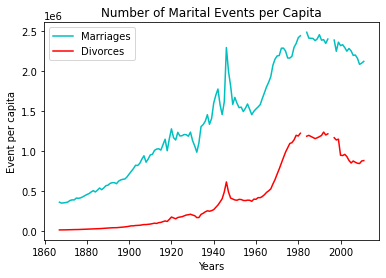

In [319]:
plt.plot(UsMarDiv['Year'],UsMarDiv['Marriages'], label='Marriages', color='c');
plt.plot(UsMarDiv['Year'],UsMarDiv['Divorces'], label='Divorces', color='r');
plt.xlabel('Years')
plt.ylabel('Event per capita')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.title('Number of Marital Events per Capita')

###__Question 7__

In [320]:
UsMarDiv2=UsMarDiv[UsMarDiv['Year'].isin([1900,1950,2000])]
UsMarDiv2

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


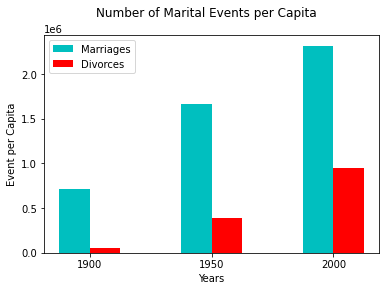

In [321]:
fig, ax = plt.subplots()
w=0.25
x = np.arange(len(UsMarDiv2))

plotm = plt.bar(x, UsMarDiv2['Marriages'], w, color='c', label='Marriages')
plotd = plt.bar(x + w, UsMarDiv2["Divorces"], w, color='r',label='Divorces')

plt.xlabel('Years')
plt.ylabel('Event per Capita')
plt.suptitle('Number of Marital Events per Capita')
plt.xticks(x + (w/2) , UsMarDiv2["Year"])
plt.legend()
plt.show()

###__Question 8__

In [322]:
kills=pd.read_csv('actor_kill_counts.csv')
kills.head(5)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


Text(0.5, 0.98, 'Kills per Actor')

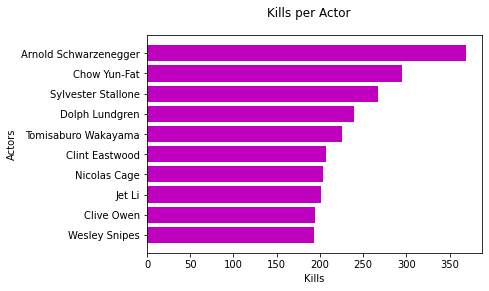

In [323]:
kills=kills.sort_values(by=['Count'])
plt.barh(kills['Actor'], kills['Count'], color='m')

plt.xlabel('Kills')
plt.ylabel('Actors')
plt.suptitle('Kills per Actor')

###__Question 9__

In [324]:
reigns=pd.read_csv('roman-emperor-reigns.csv')
reigns2= reigns[reigns['Cause_of_Death']=='Assassinated']
reigns2.head(5)

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated


Text(0.5, 1.0, 'Reign of Assassinated Emperors')

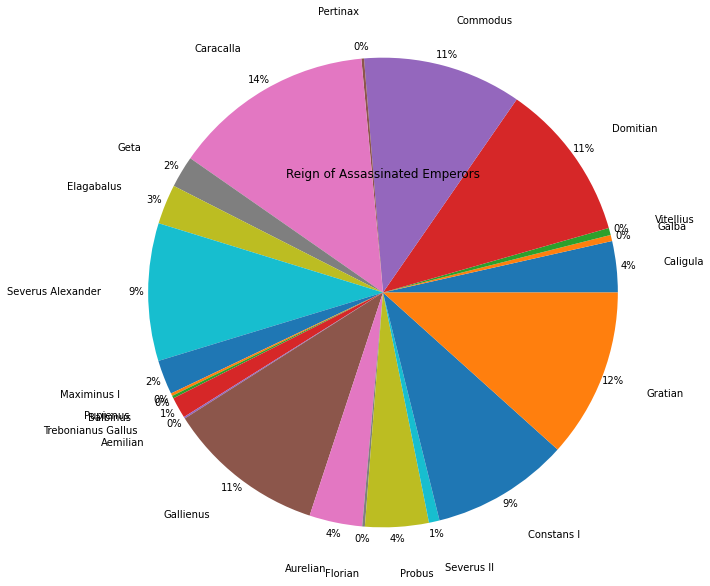

In [325]:
plt.pie(reigns2['Length_of_Reign'], labels=reigns2['Emperor'], radius=2.7, autopct='%1.0f%%', pctdistance=1.05, labeldistance=1.2)
plt.title('Reign of Assassinated Emperors')

###__Question 10__

In [326]:
revenue=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue.columns = ['Year', 'Total Arcade Revenue (Bil)', 'CS PhD Awards (US)']
revenue.head(5)

,Year,Total Arcade Revenue (Bil),CS PhD Awards (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


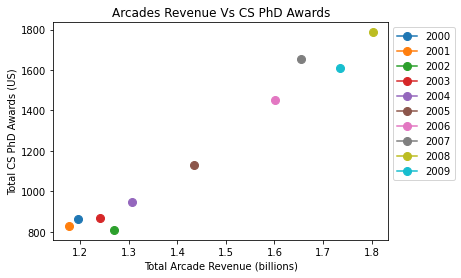

In [327]:
revenue2 = revenue.groupby('Year')
for m, n in revenue2:
    plt.plot(n['Total Arcade Revenue (Bil)'], n['CS PhD Awards (US)'], marker='o', linestyle='-', markersize=8, label=m)

    
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Total CS PhD Awards (US)')
plt.title('Arcades Revenue Vs CS PhD Awards')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')